In [1]:
import DataLoader, Training, os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
parameters = {
    # data
    "data_path": "F:/Masterthesis/Data",
    "task": "N170",
    "preprocessing": "medium",
    "n_subjects": 40,
    "reject_incorrect_responses": True,
    # model
    "model": "deep",
    "n_classes": 2,
    "n_chans": 30,
    "input_window_samples": 255,
    "seed": 42,
    # classifier
    "lr": 0.01,
    "weight_decay": 0.0,
    "batch_size": 64,
    "n_epochs": 25,
    "n_splits": 5,
    "model_folder": "models_model_comparision"
}
ch_names = ['F3','F7','FC3','C3','C5','P3','P7','P9','PO7'
            ,'PO3','O1','Oz','Pz','CPz','Fz','F4','F8','FC4',
            'FCz','Cz','C4','C6','P4','P8','P10','PO8','PO4','O2']
raw = DataLoader.load_raw(parameters, "010")
epochs = DataLoader.epoch_raw(parameters, raw)

C:\Users\vapor\Documents\Masterthesis\notebook2\DataLoader.py:17: RuntimeWarning: Data file name in EEG.data (sub-010_task-N170_eeg.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-010_ses-N170_task-N170_eeg.fdt).
  raw = read_raw_bids(bids_path)
C:\Users\vapor\Documents\Masterthesis\notebook2\DataLoader.py:17: RuntimeWarning: Expected to find a single channels file associated with sub-010_ses-N170_task-N170, but found 2: "['F:\\Masterthesis\\Data\\ERP_CORE_BIDS_Raw_Files\\sub-010\\ses-N170\\eeg\\sub-010_ses-N170_task-N170_badChannels.tsv', 'F:\\Masterthesis\\Data\\ERP_CORE_BIDS_Raw_Files\\sub-010\\ses-N170\\eeg\\sub-010_ses-N170_task-N170_channels.tsv']".

The search_str was "F:\Masterthesis\Data\ERP_CORE_BIDS_Raw_Files\sub-010\**\sub-010_ses-N170*channels.tsv"
  raw = read_raw_bids(bids_path)


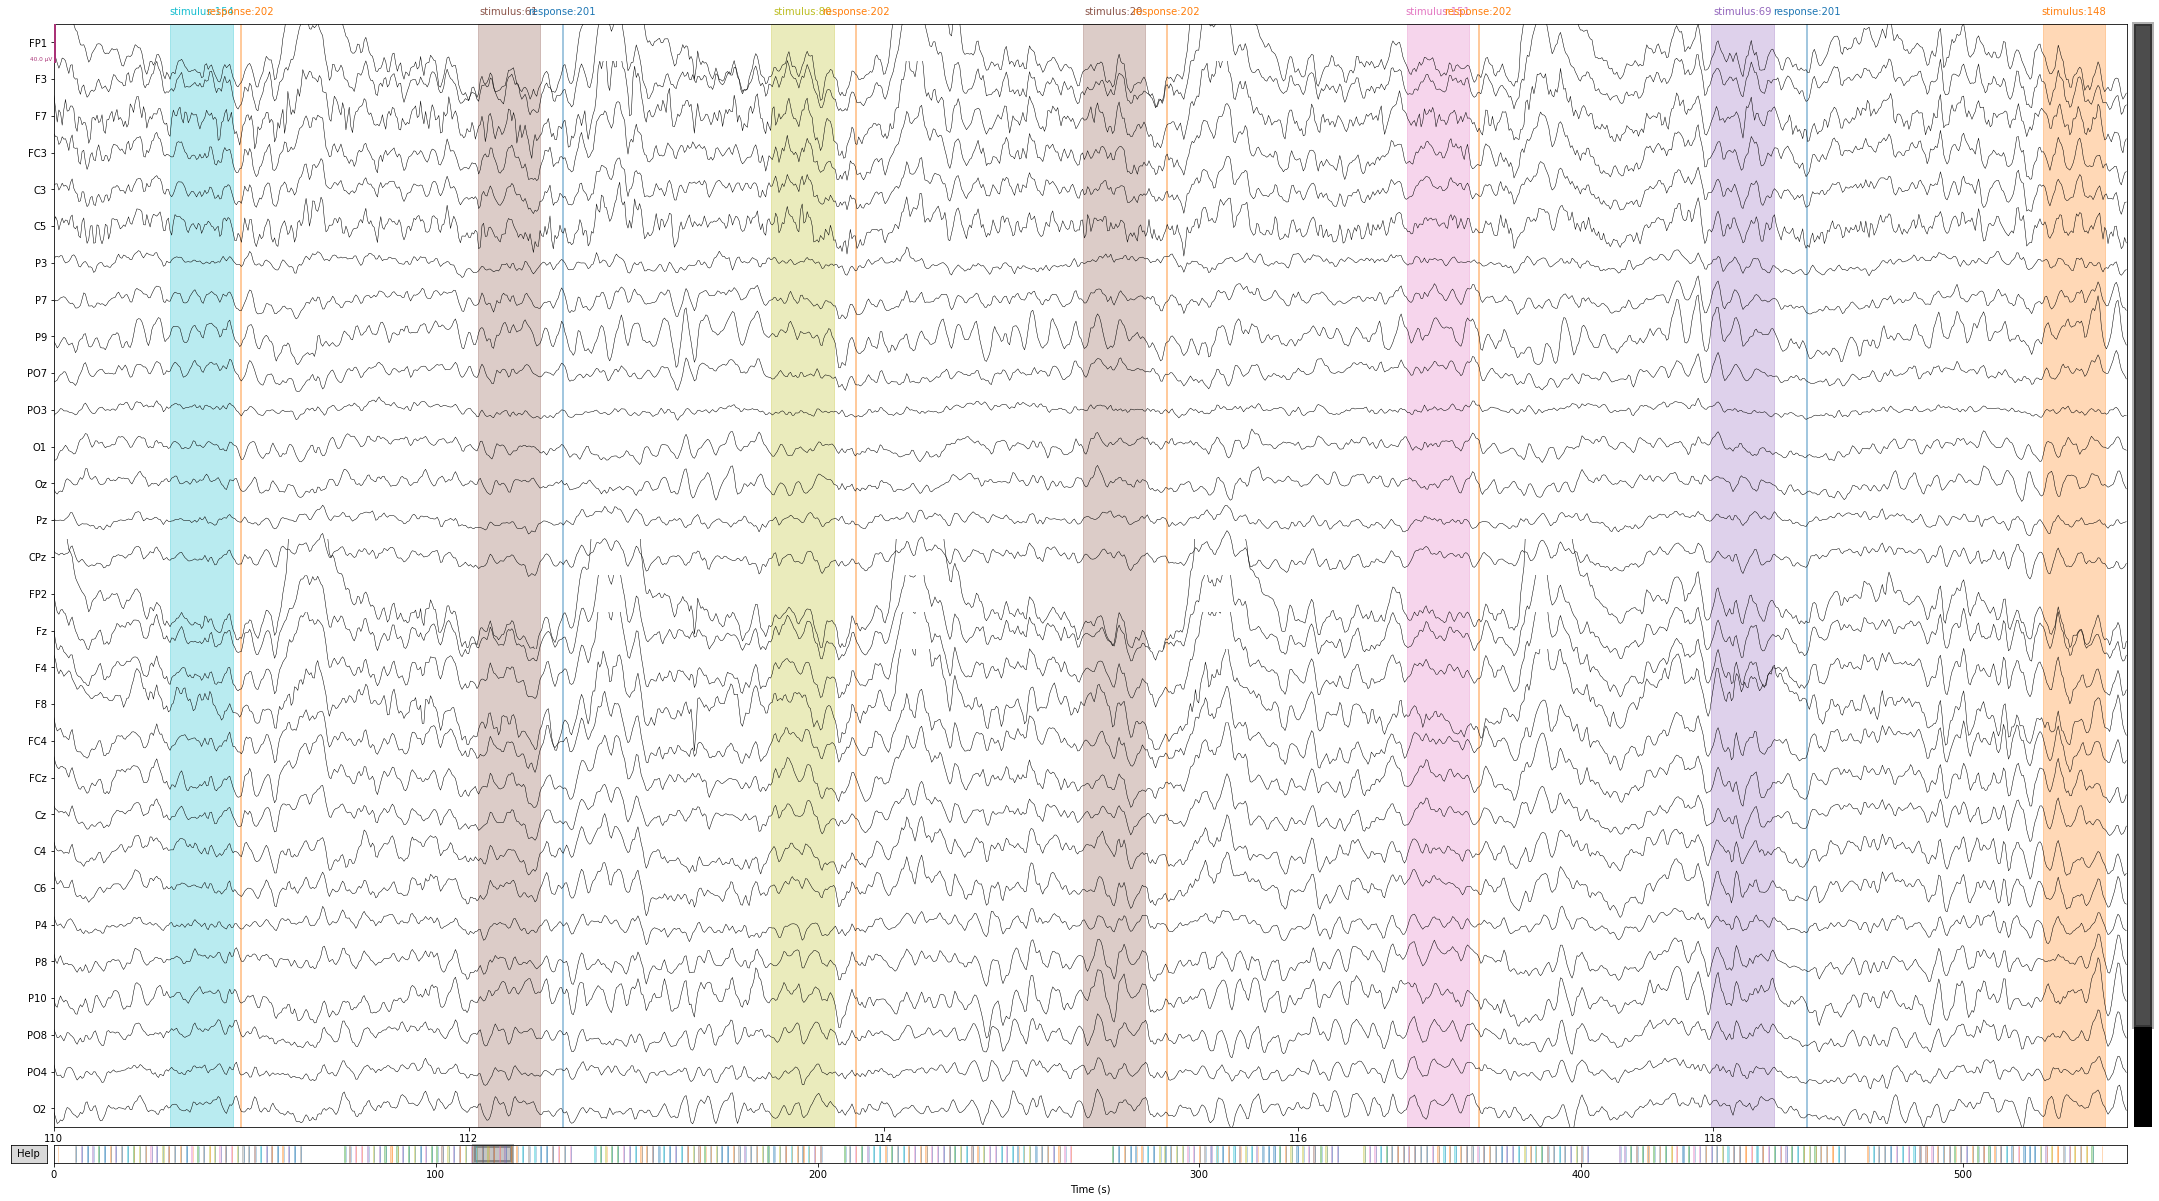

In [57]:
raw.plot(duration=10.0, start=110.0, n_channels=30);

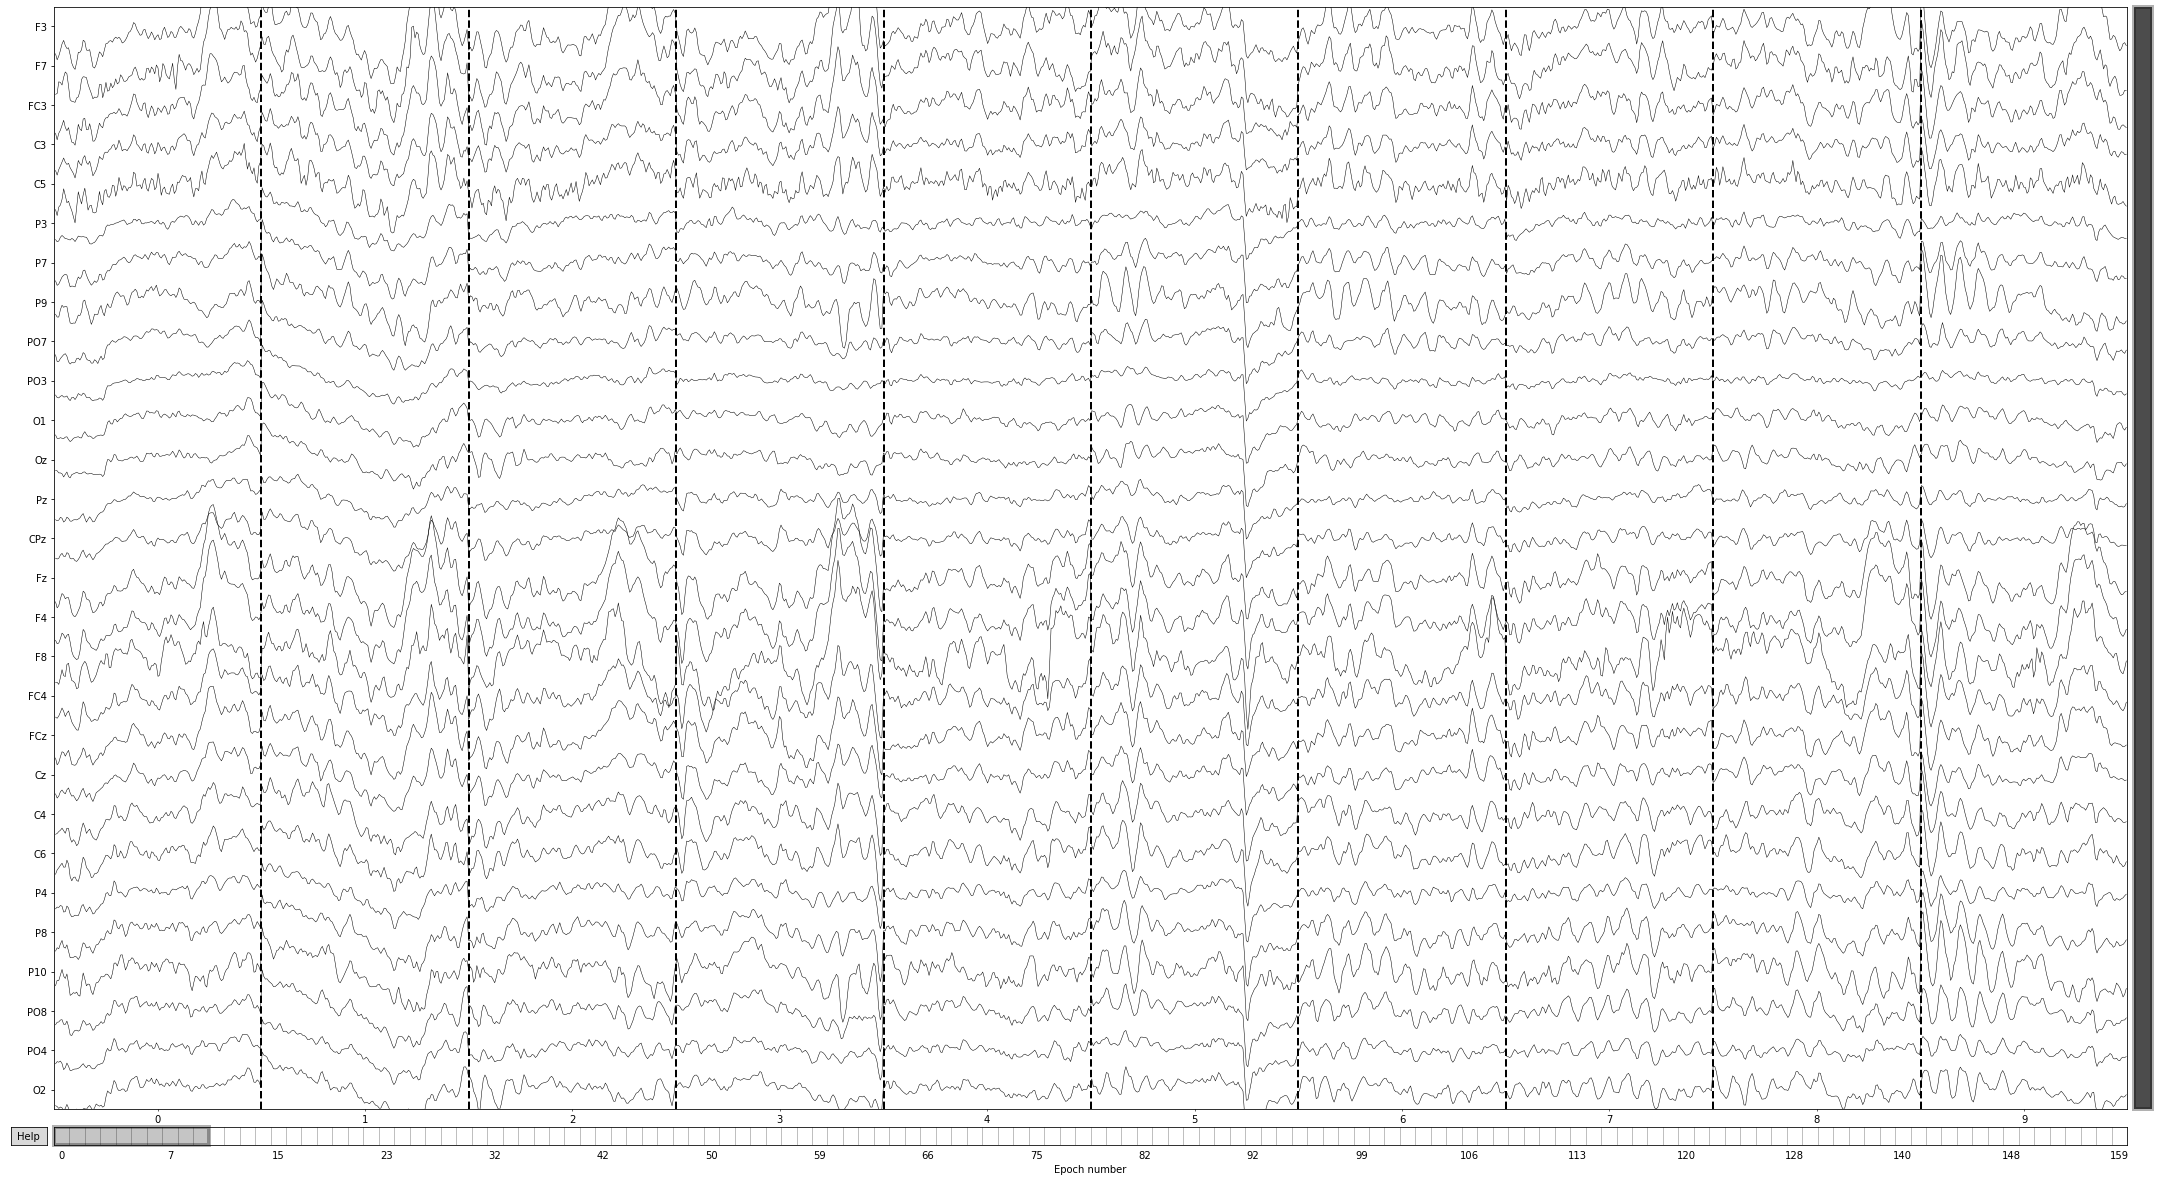

In [58]:
epochs.plot(n_epochs=10, n_channels=30, picks=ch_names);

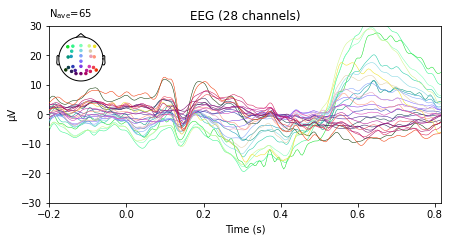

In [59]:
evoked = epochs[["stimulus:"+str(i) for i in range(1,41)]].average()
evoked.plot(spatial_colors=True, gfp=False, ylim = dict(eeg=[-30, 30]), picks=ch_names);

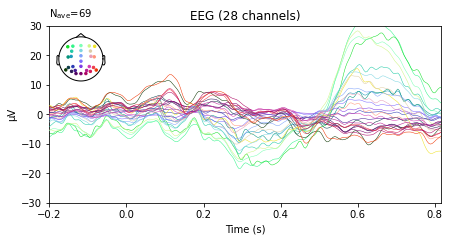

In [60]:
evoked = epochs[["stimulus:"+str(i) for i in range(41,81)]].average()
evoked.plot(spatial_colors=True, gfp=False, ylim = dict(eeg=[-30, 30]), picks=ch_names);

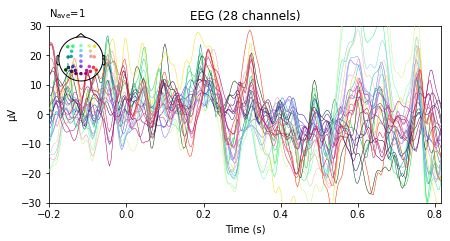

In [61]:
epochs[["stimulus:"+str(i) for i in range(1,41)]][0].average().plot(spatial_colors=True, gfp=False, ylim = dict(eeg=[-30, 30]), picks=ch_names);

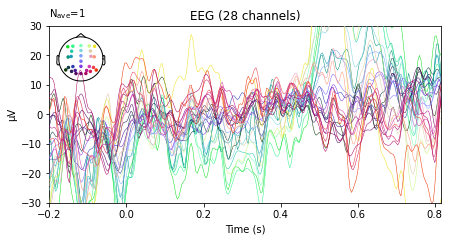

In [70]:
epochs[["stimulus:"+str(i) for i in range(41,81)]][2].average().plot(spatial_colors=True, gfp=False, ylim = dict(eeg=[-30, 30]), picks=ch_names);

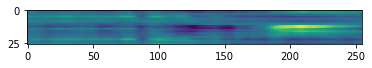

In [66]:
df_epoch = epochs[["stimulus:"+str(i) for i in range(1,41)]].average().to_data_frame(picks=ch_names).iloc[:,3:33]
plt.imshow(df_epoch.T)

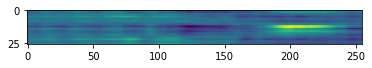

In [67]:
df_epoch = epochs[["stimulus:"+str(i) for i in range(41,81)]].average().to_data_frame(picks=ch_names).iloc[:,3:33]
plt.imshow(df_epoch.T)